In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest

# Análises gráfica e tabular

In [2]:
pd.read_csv('dados_segundo_dia/despesa_capes_2019_2022.csv').head()

,Unnamed: 0,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,0,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,006582758,2019-01-01,66.02,2116543
1,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,006582755,2019-01-01,139.98,2116546
2,2,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,00119,2019-01-01,6000.00,2113817
3,3,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.423.963/0001-11,OI MÓVEL S.A.,86161151,2019-01-01,316.39,2116541
4,4,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,007236036,2019-02-01,99.45,2116550


In [3]:
dados = pd.read_csv('dados_segundo_dia/despesa_capes_2019_2022.csv')

## 1 - Total de valor reembolsado por ano

In [4]:
dados['DATA'] = pd.to_datetime(dados['DATA'])

In [5]:
valor_por_ano = pd.DataFrame(dados.groupby(pd.Grouper(key='DATA', freq='A'))['VALOR_REEMBOLSADO'].sum()).reset_index()

In [6]:
valor_por_ano['DATA'] = valor_por_ano['DATA'].dt.year
valor_por_ano.rename(columns={'DATA':'ANO'}, inplace=True)
valor_por_ano

,ANO,VALOR_REEMBOLSADO
0,2019,25248242.40
1,2020,20414923.60
2,2021,25020323.84
3,2022,26338471.18


<AxesSubplot:title={'center':'Total de valor reembolsado por ano'}, xlabel='ANO', ylabel='VALOR_REEMBOLSADO'>

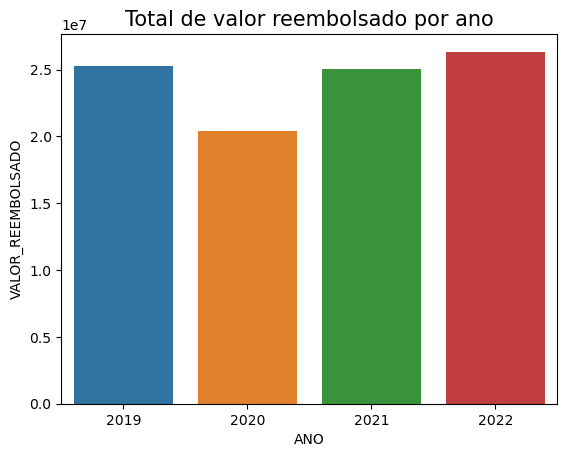

In [7]:
plt.title('Total de valor reembolsado por ano', fontsize=15)
sns.barplot(x='ANO', y='VALOR_REEMBOLSADO', data=valor_por_ano)

<AxesSubplot:title={'center':'Total de valor reembolsado por ano \n (visualização adaptada)'}, xlabel='ANO', ylabel='VALOR_REEMBOLSADO'>

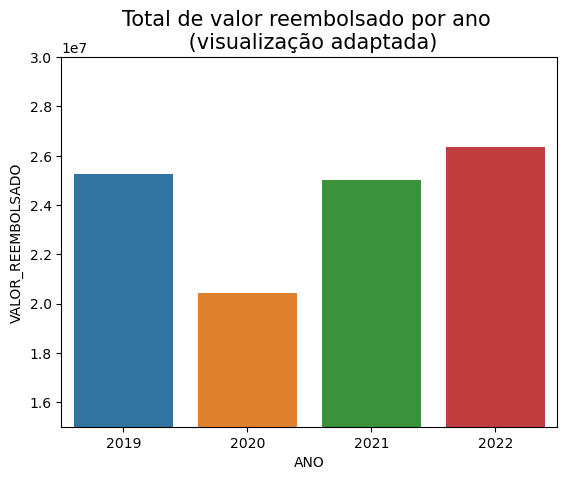

In [8]:
f, ax = plt.subplots()
plt.title('Total de valor reembolsado por ano \n (visualização adaptada)', fontsize=15)
ax.set(ylim=(15000000,30000000))
sns.barplot(x='ANO', y='VALOR_REEMBOLSADO', data=valor_por_ano)

### CONCLUSÃO

No ano de 2020 o valor reembolsado foi de aproximadamente 5 milhões menor do que nos outros anos

## 2 - Distribuição de frequência do valor reembolsado de 2019 até 2022

/home/marcelo/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de frequência do valor reembolsado'}, xlabel='VALOR_REEMBOLSADO', ylabel='Density'>

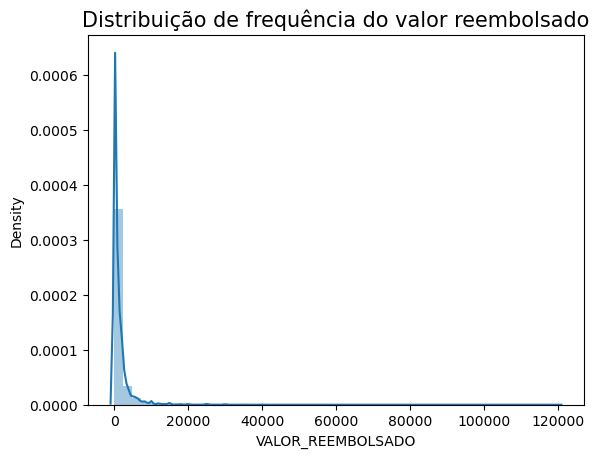

In [9]:
plt.title('Distribuição de frequência do valor reembolsado', fontsize=15)
sns.distplot(dados['VALOR_REEMBOLSADO'])

In [10]:
dados['VALOR_REEMBOLSADO'].describe()

count     68768.000000
mean       1410.859135
std        3089.421463
min           0.010000
25%         158.000000
50%         426.035000
75%        1569.520000
max      120000.000000
Name: VALOR_REEMBOLSADO, dtype: float64

### CONCLUSÃO

A distribuição de frequência do valor reembolsado apresenta assimetria a direita bastante acentuada.

Esse fenômeno é muito natural em preços de produtos e serviço, dado que na grande maioria tem-se produtos e serviços com preços mais próximos uns dos outros e uma pequena parcela deles com preços exorbitantes.

## 3 - Valor reembolsado por senador (método de agrupamento)

In [11]:
dados_agrupados_por_senador = dados['VALOR_REEMBOLSADO'].groupby(dados['SENADOR'])
dados_agrupados_por_senador = pd.DataFrame(dados_agrupados_por_senador.sum()).reset_index()
dados_agrupados_por_senador

,SENADOR,VALOR_REEMBOLSADO
0,ACIR GURGACZ,1503143.33
1,ALESSANDRO VIEIRA,1542705.53
2,ALEXANDRE SILVEIRA,236771.10
3,ALOYSIO NUNES FERREIRA,18450.05
4,ALVARO DIAS,219253.43
...,...,...
147,ZENAIDE MAIA,1355707.91
148,ZEQUINHA MARINHO,1679955.15
149,ZEZÉ PERRELLA,7961.09
150,ZÉ SANTANA,38678.43


/home/marcelo/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Box Plot do valor reembolsado por senador'}, xlabel='VALOR_REEMBOLSADO'>

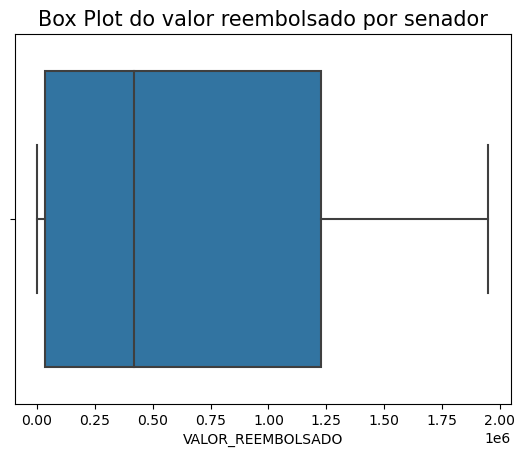

In [12]:
plt.title('Box Plot do valor reembolsado por senador', fontsize=15)
sns.boxplot(dados_agrupados_por_senador['VALOR_REEMBOLSADO'])

In [13]:
dados_agrupados_por_senador.describe()

,VALOR_REEMBOLSADO
count,1.520000e+02
mean,6.383024e+05
std,6.405574e+05
min,1.650620e+03
25%,3.346099e+04
50%,4.206213e+05
75%,1.227782e+06
max,1.949773e+06


## 4 - Valor reembolsado por fornecedor (método de agrupamento)

In [14]:
dados_agrupados_por_fornecedor = dados['VALOR_REEMBOLSADO'].groupby(dados['FORNECEDOR'])
dados_agrupados_por_fornecedor = pd.DataFrame(dados_agrupados_por_fornecedor.sum()).reset_index()
dados_agrupados_por_fornecedor

,FORNECEDOR,VALOR_REEMBOLSADO
0,",BARIORESTAURANTEE CAFÉ LTDA",143.61
1,00 JORGE DAMIAN E CIA LTDA ( POSTO),187.00
2,045 - QL 02 - CASCOL COMBUSTIVEIS PARA VEICULO...,1832.77
3,076 - Melhor 10 - Cascol Combustíveis para Veí...,1250.00
4,08 BRASIL 21 EVENTOS E HOTELARIA LTDA,82.00
...,...,...
8623,Ádria Viagens e Turismo Ltda Me,324916.11
8624,Águas Cuiabá SA Concessionária de Serviço,609.88
8625,Águas Guariroba S.A.,1432.64
8626,Águia Turismo Ltda,6836.58


/home/marcelo/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Box Plot do valor reembolsado por fornecedor'}, xlabel='VALOR_REEMBOLSADO'>

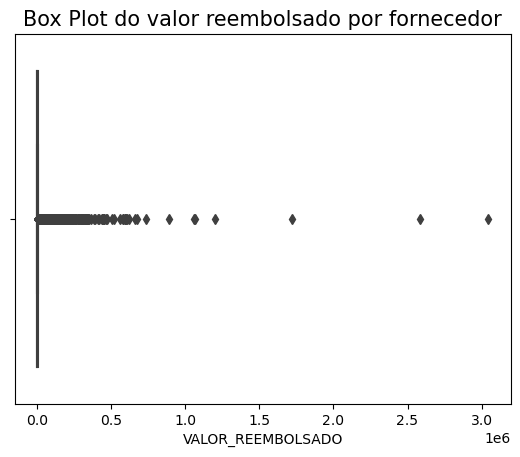

In [15]:
plt.title('Box Plot do valor reembolsado por fornecedor', fontsize=15)
sns.boxplot(dados_agrupados_por_fornecedor['VALOR_REEMBOLSADO'])

/home/marcelo/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Box Plot do valor reembolsado por fornecedor \n (visualização adaptada)'}, xlabel='VALOR_REEMBOLSADO'>

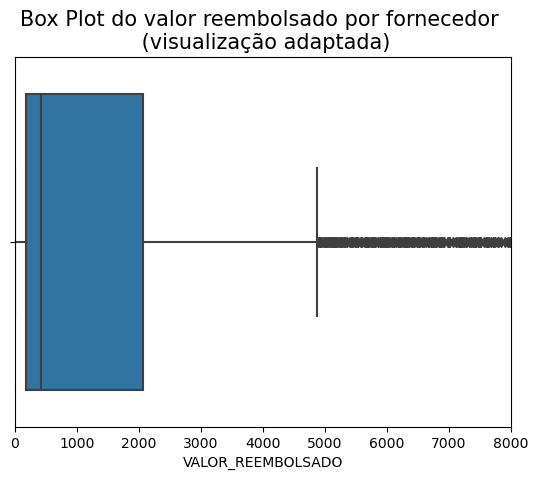

In [16]:
f, ax = plt.subplots()
plt.title('Box Plot do valor reembolsado por fornecedor \n (visualização adaptada)', fontsize=15)
ax.set(xlim=(0,8000))
sns.boxplot(dados_agrupados_por_fornecedor['VALOR_REEMBOLSADO'])

In [17]:
dados_agrupados_por_fornecedor.describe()

,VALOR_REEMBOLSADO
count,8.628000e+03
mean,1.124501e+04
std,6.638296e+04
min,3.000000e-02
25%,1.857625e+02
50%,4.180000e+02
75%,2.064625e+03
max,3.045865e+06


## 5 - Valor reembolsado por senador (método do agrupamento com classes)

Classe E - de 0 a 5 mil
<br>Classe D - de 5 mil a 25 mil
<br>Classe C - de 25 mil a 100 mil
<br>Classe B - de 100 mil a 800 mill
<br>Classe A - de 800 mil a 2 milhões

In [18]:
classes = [0,5000,25000,100000,800000,2000000]
labels = ['E','D', 'C', 'B', 'A']
frequencia = pd.cut(x=dados_agrupados_por_senador['VALOR_REEMBOLSADO'],bins=classes,labels=labels)\
.value_counts()
percentual = pd.cut(x=dados_agrupados_por_senador['VALOR_REEMBOLSADO'],bins=classes,labels=labels)\
.value_counts(normalize = True)

In [19]:
dist_freq_quantitativas_por_senador = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_por_senador

,Frequência,Porcentagem (%)
A,61,0.401316
B,36,0.236842
D,28,0.184211
C,23,0.151316
E,4,0.026316


([<matplotlib.patches.Wedge at 0x7f19591b9220>,
 [Text(0.3355913442036526, 1.0475583275863858, 'A'),
  Text(-1.0915526447507407, -0.13606183791814502, 'B'),
  Text(-0.1360619401166795, -1.0915526320117073, 'D'),
  Text(0.8818323949655614, -0.6575497146142658, 'C'),
  Text(1.0962429401251839, -0.09083730635423204, 'E')])

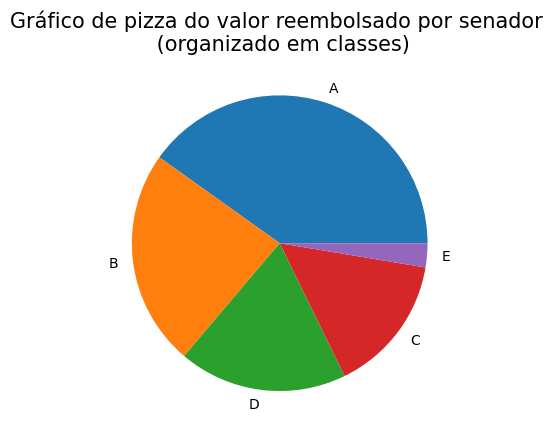

In [20]:
plt.title('Gráfico de pizza do valor reembolsado por senador \n (organizado em classes)', fontsize=15)
plt.pie(dist_freq_quantitativas_por_senador["Frequência"],labels=dist_freq_quantitativas_por_senador.index)

## 5 - Valor reembolsado por fornecedor (método do agrupamento com classes)

Classe E - de 0 a 5 mil
<br>Classe D - de 5 mil a 25 mil
<br>Classe C - de 25 mil a 100 mil
<br>Classe B - de 100 mil a 800 mill
<br>Classe A - de 800 mil a 3.5 milhões

In [21]:
classes = [0,5000,25000,100000,800000,3500000]
labels = ['E','D', 'C', 'B', 'A']
frequencia = pd.cut(x=dados_agrupados_por_fornecedor['VALOR_REEMBOLSADO'],bins=classes,labels=labels)\
.value_counts()
percentual = pd.cut(x=dados_agrupados_por_fornecedor['VALOR_REEMBOLSADO'],bins=classes,labels=labels)\
.value_counts(normalize = True)

In [22]:
dist_freq_quantitativas_por_fornecedor = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_por_fornecedor.sort_values(by='Frequência', inplace=True)
dist_freq_quantitativas_por_fornecedor

,Frequência,Porcentagem (%)
A,7,0.000811
B,203,0.023528
C,484,0.056096
D,814,0.094344
E,7120,0.825220


([<matplotlib.patches.Wedge at 0x7f1959116610>,
 [Text(1.0999964269590197, 0.002803689959682386, 'A'),
  Text(1.0965680915674918, 0.08682407820431498, 'B'),
  Text(1.040945324559189, 0.35557394628735783, 'C'),
  Text(0.7649689010947143, 0.7904571970435499, 'D'),
  Text(-0.9383015449763707, -0.5740994780479737, 'E')])

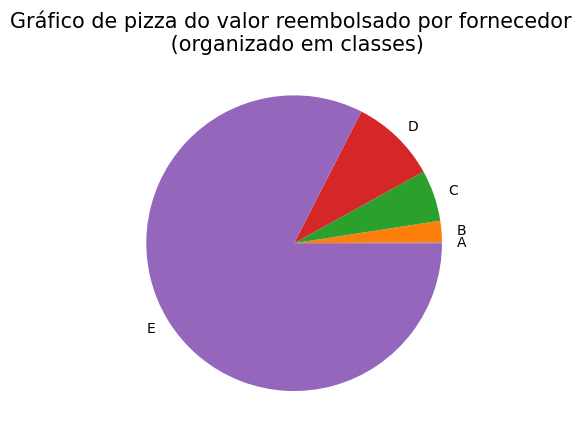

In [23]:
plt.title('Gráfico de pizza do valor reembolsado por fornecedor \n (organizado em classes)', fontsize=15)
plt.pie(dist_freq_quantitativas_por_fornecedor["Frequência"],labels=dist_freq_quantitativas_por_fornecedor.index)

### CONCLUSÃO

Os resultados obtidos pelo método do agrupamento apresentaram resultados com assimetrias selemelhantes em intencidades diferentes para senadores e fornecedores.

Utilizando o método de agrupamento com classes as intencidades permaneceram com o mesmo grau de diferença, porém as assimetrias ficaram opostas.

## 6 - Teste de hipótese de distribuição normal do valor reembolsado por senador

Analisando os resultados obtidos, surgiu a suspeita da distribuição de frequência do valor reembolsado por senador se comportar como distribuição normal.

Para testar essa hipótese será utilizado o normal teste com a hipótese nula da distribuição de frequência ser uma distribuição normal com valor de significância igual a 5%.

/home/marcelo/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de frequência do valor reembolsado por senador'}, xlabel='VALOR_REEMBOLSADO', ylabel='Density'>

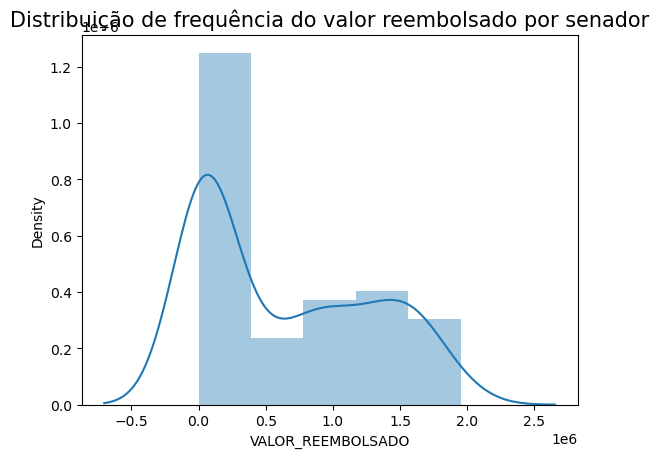

In [24]:
plt.title('Distribuição de frequência do valor reembolsado por senador', fontsize=15)
sns.distplot(dados_agrupados_por_senador['VALOR_REEMBOLSADO'])

In [26]:
_, p_valor = normaltest(dados_agrupados_por_senador['VALOR_REEMBOLSADO'])
p_valor

3.211735063544981e-24

### CONCLUSÃO

A aplicação do normaltest obteve um p_valor < significância, descantando a hipótese nula.